# **Problem 1** - Basin of Attraction
Consider a differentiable function, denoted as $f(x)$, that possesses multiple roots. When initiating Newton-Raphson's Method with a given starting value for $x$, the process typically converges to one of the roots, barring exceptional cases outlined in the lecture slide. It stands to reason that starting points near each other should all end up at the same root, and for some functions this is true. However, it is not true in general.

A *basin of attraction* for a root is defined as the collection of $x$-values that, under Newton iterations, converge to that specific root. In the context of this problem, you will generate color-coded plots to visualize the basins of attraction for the following functions according to the following procedure:



*   Find the actual roots of the function by hand (this should be easy on the functions below).
*   Assign each of the roots a different color.
*   Pick a starting point on the $x$-axis and use it to start Newton-Raphson's method.
*   Color the starting point according to the root that it converges to.
*   Repeat this process for many many starting points so you get a colored picture of the $x$-axis showing where the starting points converge to.

The group of points sharing a common color designation represents the basin of attraction corresponding to the root associated with that particular color.

An example basin of attraction image for a cubic function looks something like this.
<br>
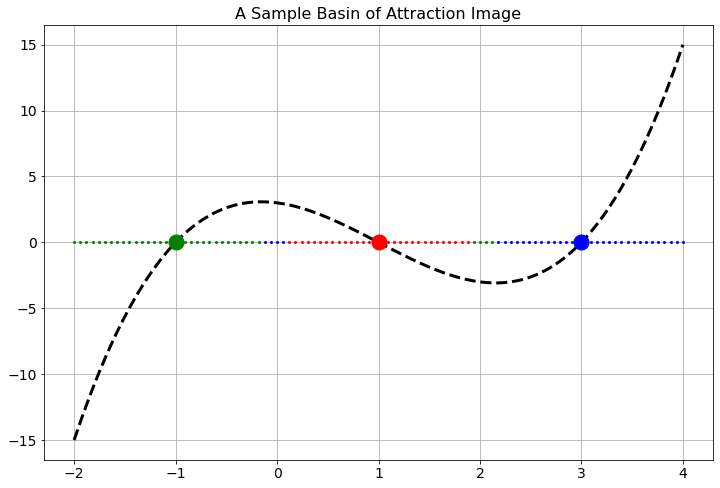

1.   Create a basin on attraction image for the function $f(x) = (x-4)(x+1)$.
2.   Create a basin on attraction image for the function $g(x) = (x-1)(x+3)$.
3.   Create a basin on attraction image for the function $h(x) = (x-4)(x-1)(x+3)$.

**Note:** You can use `matplotlib`, `plotly`, `pyplot`, `seaborn` or whatever plotting package you want.












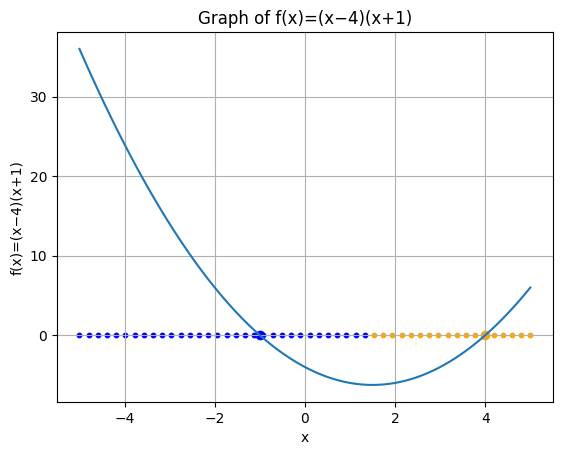

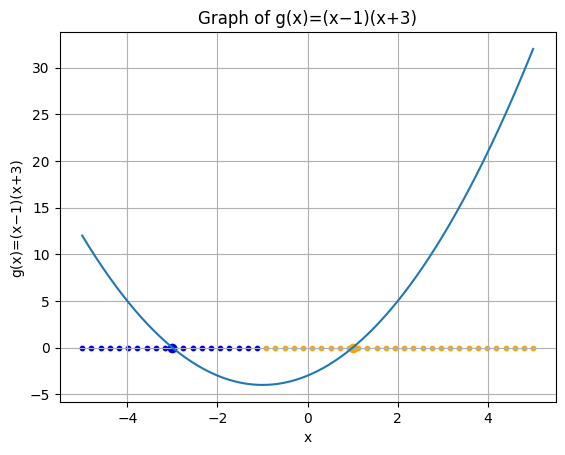

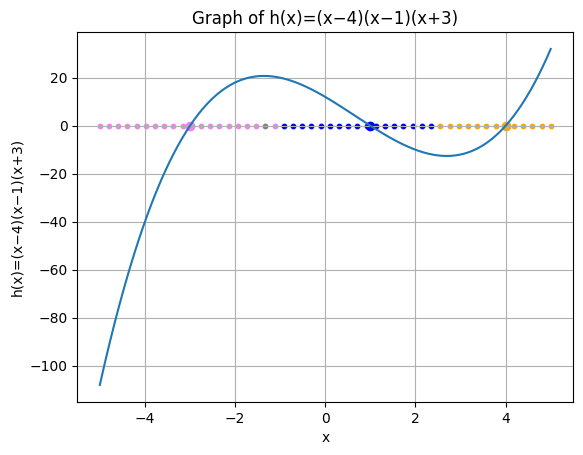

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f1(x):
  return (x - 4) * (x + 1)

def f2(x):
  return (x - 1) * (x + 3)

def f3(x):
  return (x - 4) * (x - 1) * (x + 3)

functions = [f1, f2, f3]
roots_list = [[4, -1],[1, -3],[4, 1, -3]]
root_colours = ['orange', 'blue', 'violet']
initial_guesses = np.linspace(-5, 5, 40)
names = ["f(x)=(x−4)(x+1)",
        "g(x)=(x−1)(x+3)",
        "h(x)=(x−4)(x−1)(x+3)"]
initial_guesses = np.linspace(-5, 5, 50)
for i in range(len(functions)) :
  f = functions[i]
  name = names[i]
  roots = roots_list[i]

  # Original Graph
  x_values = np.linspace(-5, 5, 1000)
  plt.plot(x_values, f(x_values), label = name)
  for j, root in enumerate(roots):
    plt.scatter(root, 0, color=root_colours[j])
  # Scatter Plot
  for x_guess in initial_guesses:
    try:
      x_root = newton(f, x_guess)
      # Find which root it matches with
      for index, value in enumerate(roots):
        if abs(value - x_root) < 0.0001:
            plt.scatter(x_guess, 0, color=root_colours[index], s=10)
            break
    except RuntimeError:
        # Catch RuntimeError if Newton-Raphson doesn't converge or something
        plt.scatter(x_guess, 0, color='grey', s=10)

  plt.title('Graph of ' + name)
  plt.xlabel('x')
  plt.ylabel(name)
  plt.grid(True)
  plt.show()


# **Problem 2** - The Goat Problem
To understand the problem statement, grab a pencil and a piece of paper at first!
* Draw a coordinate plane
* Draw a circle with radius $1$ unit centered at the point $(0,1)$. This circle will obviously be tangent to the $x$-axis.
* Draw a circle with radius $r$ centered at the point $(0,0)$. Take $0< r < 2$ so there are two intersections of the two circles.
* Label the left-hand intersection of the two circles as point $A$. (Point $A$ should be in the second quadrant of your coordinate plane.)
* Label the right-hand intersection of the two circles as point $B$. (Point $B$ should be in the first quadrant of your coordinate plane.)
* Label the point $(0,0)$ as the point $P$.

A rancher has built a circular fence of radius $1$ unit centered at the point $(0,1)$ for his goat to graze. He tethers his goat at point $P$ on the far south end of the circular fence. He wants to make the length of the goat’s chain, $r$, just long enough so that it can graze half of the area of the fenced region. How long should he make the chain?

**Hints:**

*   It would be helpful to write equations for both circles. Then you can use the equations to find the coordinates of the intersection points $A$ and $B$.
* You can either solve for the intersection points algebraically or you can use a numerical root finding technique to find the intersection points.
* In any case, the intersection points will (obviously) depend on the value of $r$.
* Set up an integral to find the area grazed by the goat.
* You will likely need to use a numerical integration technique to evaluate the integral.
* You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the `scipy.integrate.quad()` function.

Write your code to narrow down on the best value of $r$ where the integral evaluates to half the area of the fenced region.


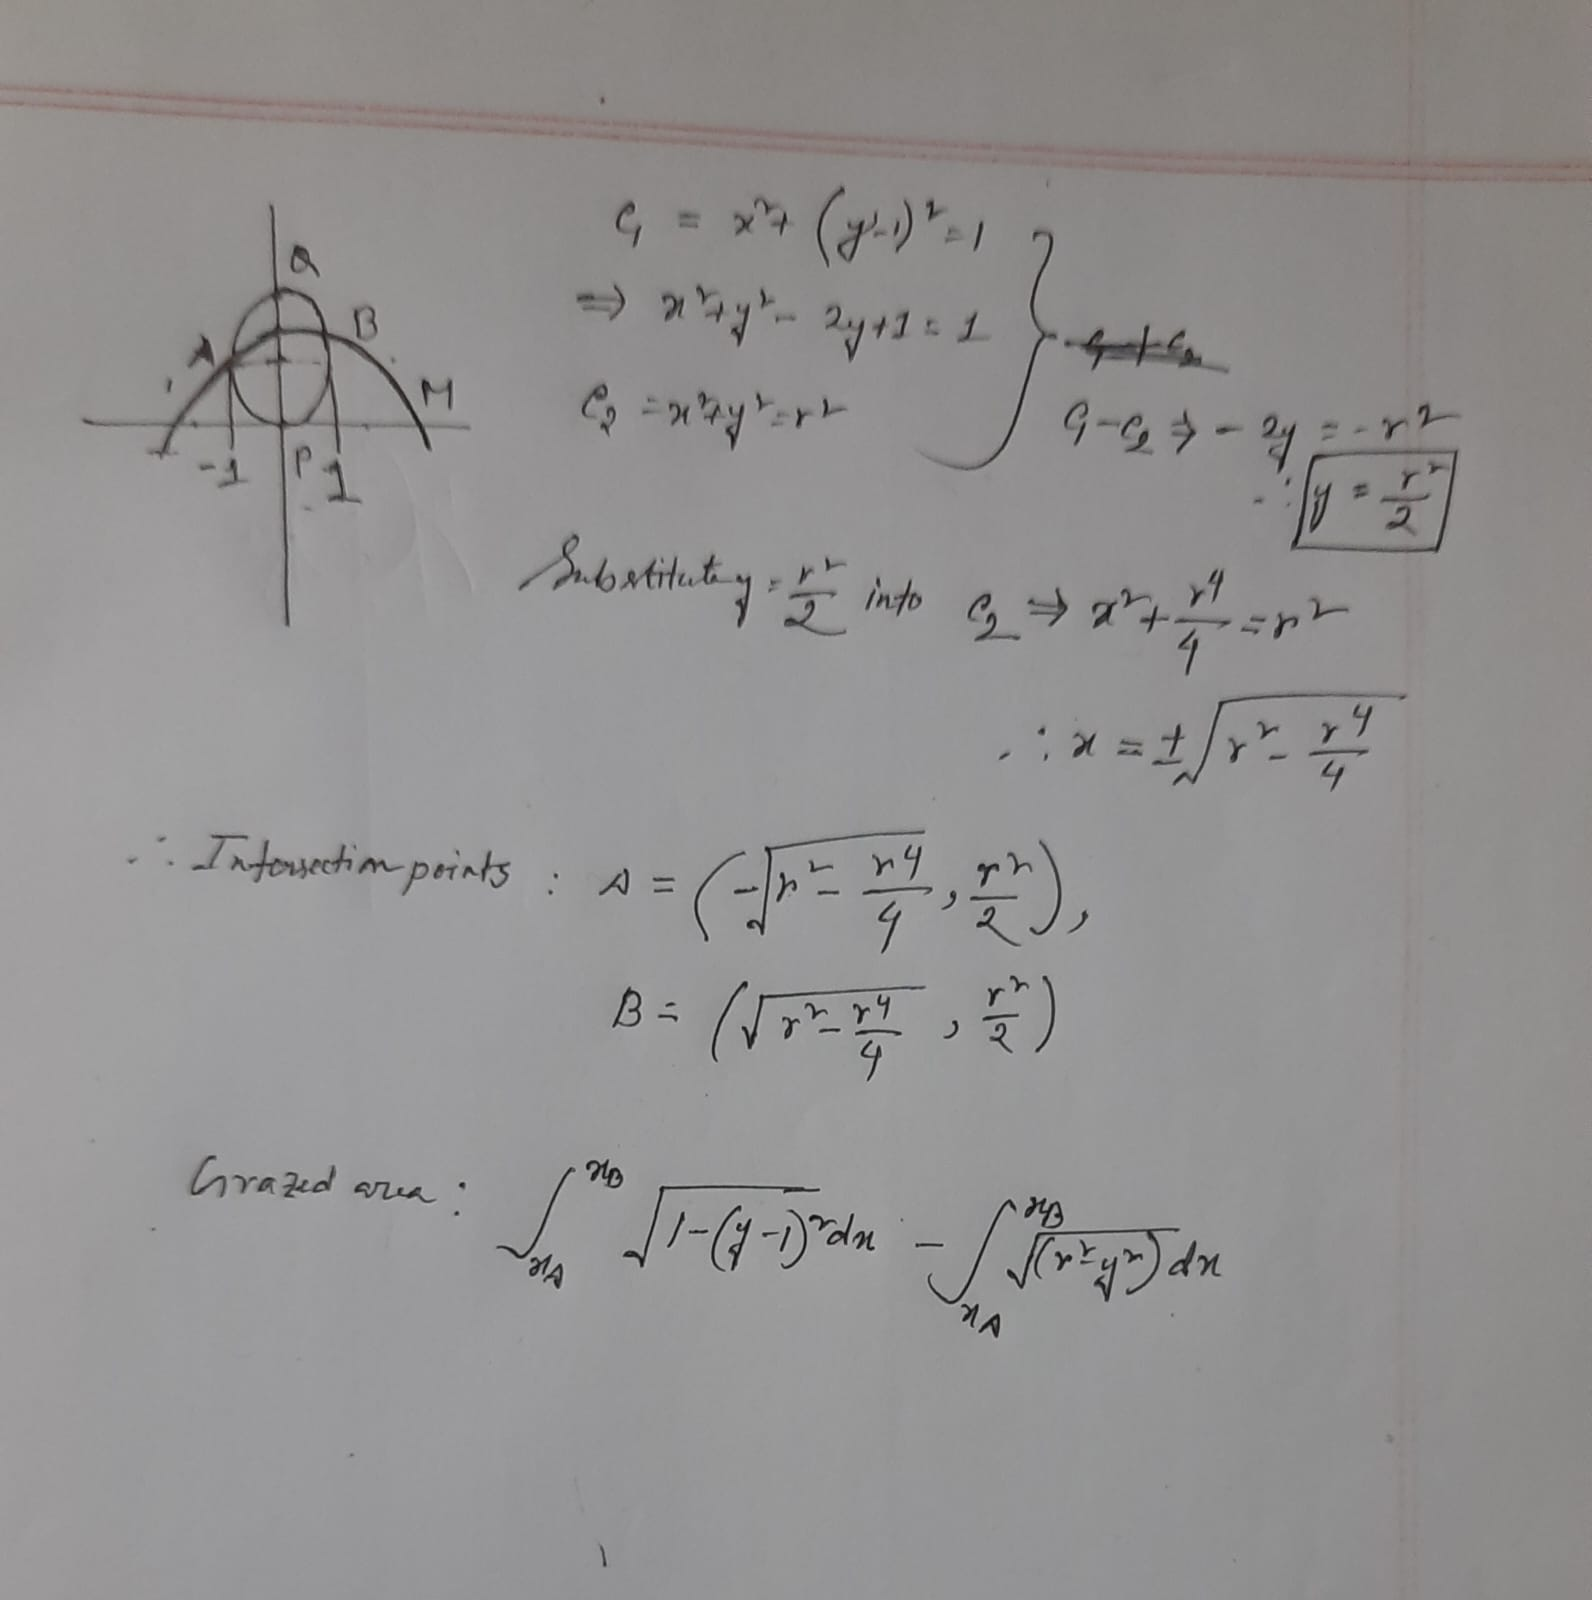

In [ ]:
from scipy.optimize import minimize
import numpy as np
from scipy.integrate import quad

def f(x, r):
    return np.sqrt(r**2 - x**2) + np.sqrt(1 - x**2) - 1

def intersection_limit(r):
    return np.sqrt(r**2 - (r**4) / 4)

def cost_function(r):
    target_area = 0.25 * np.pi
    limit = intersection_limit(r)

    def integrand(x):
        return f(x, r)

    # integral from 0 to the limit
    integral_value, _ = quad(integrand, 0, limit)
    return abs(integral_value - target_area)


result = minimize(cost_function, x0=1.0, bounds=[(0, None)])


optimal_r = result.x[0]
print("Optimal value of r:", optimal_r)


<ipython-input-73-b142193352f9>:9: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r**2 - (r**4) / 4)


Optimal value of r: 1.1587284722201026


# **Problem 3** - Game of Cookies
Alice is a dessert-queen who can make exceptionally yummy chocolate chip cookies. Bob is a cookie connoisseur whose hunger rivals that of the (in)famous Cookie Monster from Sesame Street. One day, Alice and Bob decide to play a game. Bob chooses an arbitrary positive integer $k$. Alice doesn't know what this number $k$ is. She chooses two real numbers $a$ and $b$ randomly from within the interval $[0,1]$ with uniform distribution. Suppose, you are acting as the referee in this game. You compute the square root of the sum $(ak+1)^2 + (bk+1)^2$ and round it to the nearest integer. If the result is equal to $k$, Bob gets to eat $k$ of Alice's cookies for free; otherwise he doesn't get to eat any cookies.

For example, if $k = 6$, $a = 0.2$, and $b=0.85$, then the value that you get would be $\sqrt{(ak+1)^2 + (bk+1)^2} = \sqrt{42.05} = 6.484$. After you round it to the nearest integer it becomes $6$ which is equal to $k$. So, Bob will be allowed to eat $6$ cookies.

## Input
You'll be given the value of $n$, the number of turns of the game.

## Output
Print the expected value of the total number of cookies Bob will eat, rounded to five decimal places, if he plays $n$ turns with $k=1$, $k=2$, $k=3$, $\dots$, $k=n$ (for the $1^{st}$, $2^{nd}$, $3^{rd}$, $\dots$, and $n^{th}$ turns respectively).

### Sample Cases
#### Input
$10$

#### Output
$10.20914$

#### Input
$73$

#### Output
$105.27674$

#### Input
$100000$

#### Output
$157055.80999$

#### Input
$69420$

#### Output
$109021.5883$

**Hint:** You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the `scipy.integrate.quad()` function.

In [ ]:
import random
import math

def play_game(k, a, b):
    result = math.sqrt((a*k + 1)**2 + (b*k + 1)**2)
    return round(result)

def expected_cookies(n):
    total_cookies = 0
    for k in range(1, n+1):
        cookies_eaten = 0
        for _ in range(10000):  # Simulate 10000 games for each k
            a = random.uniform(0, 1)
            b = random.uniform(0, 1)
            if play_game(k, a, b) == k:
                cookies_eaten += k
        total_cookies += cookies_eaten / 10000  # Average over the 10000 games

    return round(total_cookies, 5)

n = [10,73] # the rest of the two takes a lot of time!Gave up
for n in n:
  result = expected_cookies(n)
  print(f"Expected value of total cookies eaten after {n} turns: {result}")



Expected value of total cookies eaten after 10 turns: 10.0866
Expected value of total cookies eaten after 73 turns: 105.2912


# **Problem 4** - Geronimo!
An object falling vertically through the air is subject to friction due to air resistance as well as gravity. The function describing the position of such a function is
$$s(t) = s_0 - \frac{mg}{k}t + \frac{m^2g}{k^2}\left(1-e^{-kt/m}\right)$$
where $m$ is the mass measured in kg, $g$ is gravity measured in meters per second per second, $s_0$ is the initial position measured in meters, and $k$ is the coefficient of air resistance.

If $m=1kg$, $g=9.8ms^{-2}$, $k=0.1$, and $s_0=100m$, how long will it take for the object to hit the ground?

In [ ]:
import numpy as np
import pandas as pd

m = 1
g = 9.8
k = 0.1
s0 = 100
def position(t):
    return s0 - (m * g / k) * t + (m**2 * g / k**2) * (1 - np.exp(-k * t / m))

time_values = np.linspace(0, 50, 10000)  # Generate 10,000 time points from 0 to 50 seconds


positions = position(time_values)

data = pd.DataFrame({"time": time_values, "position": positions})

# Find the first time when the position is less than or equal to zero
time_to_hit_ground = data[data["position"] <= 0].iloc[0]["time"]

print(f"The object will hit the ground after approx. {time_to_hit_ground} seconds.")

The object will hit the ground after approx. 4.885488548854886 seconds.


# **Problem 5** - Int$\times$Plot
Numerically integrate each of the functions over the interval $[-1,2]$ with an appropriate technique and verify mathematically that your numerical integral is correct to 10 decimal places. Then provide a plot of the function along with its area beneath the curve.


1.   $f(x) = \frac{x}{1+x^4}$
2.   $g(x) = (x-1)^3(x-2)^2$
3. $h(x) = \sin(x^2)$

**Note:** Implement your own numerical integration function for this problem.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import quad, sin


In [ ]:
# The Funcs
f1 = lambda x: x / (1 + x**4)
f2 = lambda x: (x - 1)**3 * (x - 2)**2
f3 = lambda x: np.sin(x**2)

In [ ]:
# Simpson's 3/8 rule
def simpsons_38_integration(f, a, b, n):
    if n % 3 != 0:
        raise ValueError("Number of intervals (n) must be a multiple of 3 for Simpson's 3/8 rule.")

    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n

    integral = y[0] + y[-1]
    for i in range(1, n):
        if i % 3 == 0:
            integral += 2 * y[i]
        else:
            integral += 3 * y[i]

    integral *= (3 * h / 8)
    return integral

In [ ]:
# limits and intervals
a, b = -1, 2
n = 300  # High number of intervals for precision

# Numerical integration with Simpson's 3/8 rule
integral_f1 = simpsons_38_integration(f1, a, b, n)
integral_f2 = simpsons_38_integration(f2, a, b, n)
integral_f3 = simpsons_38_integration(f3, a, b, n)

# High-precision
f1_mpmath = lambda x: x / (1 + x**4)
f2_mpmath = lambda x: (x - 1)**3 * (x - 2)**2
f3_mpmath = lambda x: sin(x**2)

integral_f1_mpmath = quad(f1_mpmath, [a, b])
integral_f2_mpmath = quad(f2_mpmath, [a, b])
integral_f3_mpmath = quad(f3_mpmath, [a, b])

In [ ]:

print(f"Numerical integration of f1(x) over [{a}, {b}] (Simpson's 3/8): {integral_f1:.10f}")
print(f"Numerical integration of f2(x) over [{a}, {b}] (Simpson's 3/8): {integral_f2:.10f}")
print(f"Numerical integration of f3(x) over [{a}, {b}] (Simpson's 3/8): {integral_f3:.10f}")

print(f"\nHigh-precision integration of f1(x) over [{a}, {b}] (mpmath): {float(integral_f1_mpmath):.10f}")
print(f"High-precision integration of f2(x) over [{a}, {b}] (mpmath): {float(integral_f2_mpmath):.10f}")
print(f"High-precision integration of f3(x) over [{a}, {b}] (mpmath): {float(integral_f3_mpmath):.10f}")

Numerical integration of f1(x) over [-1, 2] (Simpson's 3/8): 0.2702097489
Numerical integration of f2(x) over [-1, 2] (Simpson's 3/8): -27.4500000405
Numerical integration of f3(x) over [-1, 2] (Simpson's 3/8): 1.1150447968

High-precision integration of f1(x) over [-1, 2] (mpmath): 0.2702097501
High-precision integration of f2(x) over [-1, 2] (mpmath): -27.4500000000
High-precision integration of f3(x) over [-1, 2] (mpmath): 1.1150447911


In [ ]:
x_vals = np.linspace(a, b, 1000)

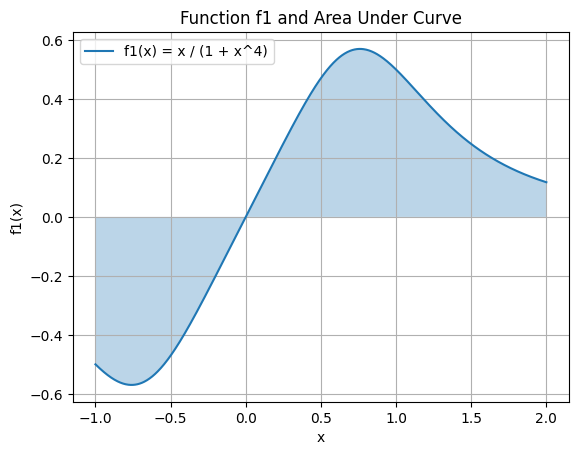

In [ ]:
# f1(x)
plt.figure()
plt.plot(x_vals, f1(x_vals), label="f1(x) = x / (1 + x^4)")
plt.fill_between(x_vals, f1(x_vals), alpha=0.3)
plt.title("Function f1 and Area Under Curve")
plt.xlabel("x")
plt.ylabel("f1(x)")
plt.legend()
plt.grid()
plt.show()


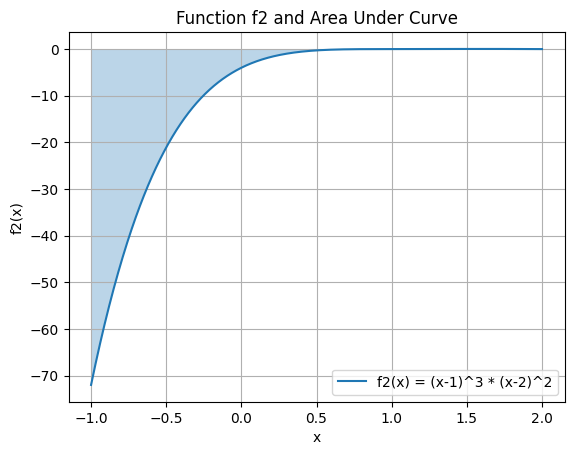

In [ ]:
# f2(x)
plt.figure()
plt.plot(x_vals, f2(x_vals), label="f2(x) = (x-1)^3 * (x-2)^2")
plt.fill_between(x_vals, f2(x_vals), alpha=0.3)
plt.title("Function f2 and Area Under Curve")
plt.xlabel("x")
plt.ylabel("f2(x)")
plt.legend()
plt.grid()
plt.show()

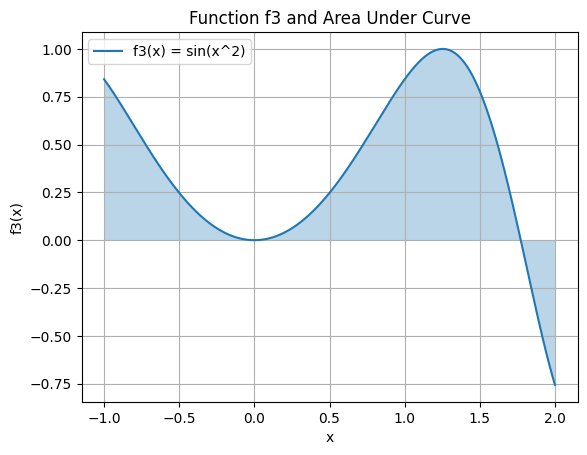

In [ ]:
# f3(x)
plt.figure()
plt.plot(x_vals, f3(x_vals), label="f3(x) = sin(x^2)")
plt.fill_between(x_vals, f3(x_vals), alpha=0.3)
plt.title("Function f3 and Area Under Curve")
plt.xlabel("x")
plt.ylabel("f3(x)")
plt.legend()
plt.grid()
plt.show()